# Практическая работа №2: Моделирование стандартных дискретных сигналов

Выполнили студенты гр. 0383 Желнин Максим, Рудакова Юлия и Петровская Евгения. Вариант №17.

## Цель работы

Изучить математическое описание линейных комбинаций дискретных гармонических сигналов и овладеть программными средствами их моделирования.

## Основные теоретические положения

**Дискретный сигнал** - сигнал который изменяется только в определенные моменты времени и может принимать только определенные значения.

**Гармонический сигнал** - гармонические колебания, со временем распространяющиеся в пространстве, которые описываются уравнением:

$$y = Acos(wt + \phi_0)$$

**Линейная комбинация** - выражение, построенное на множестве элементов путем умножения каждого элемента на коэффициенты с последующим сложением результатов.

**Среднее значение дискретного сигнала:** $M = \frac{\sum_{k=0}^{N}x(k)}{N}$

**Энергия дискретного сигнала:** $E = \sum_{k=0}^{N}|x(k)|^2$

**Средняя мощность дискретного сигнала:** $P = \frac{E}{N} = \frac{\sum_{k=0}^{N}|x(k)|^2}{N}$

**Огибающая сигнала** - функция, построенная по характерным точкам данного сигнала, т.е. описывающая изменения какого-либо параметра во времени - обычно амплитуды.

## Постановка задачи

С помощью программных средств провести моделирование и анализ линейных комбинаций дискретных гармонических последовательностей. Результаты подкрепить соответствующими графиками и выводами.

## Выполнение работы

Обозначим переменные соответственно варианту:

Номер бригады $N_{бр} = 17$

Длина последовательности $N = 30 + N_{бр} \bmod 5$ 

Основание экспоненты $a=(-1)^{N_{бр}}(0.8 + 0.005(N_{бр} \bmod 20))$

Амплитуа гармонического сигнала $C = 1 + N_{бр} \bmod 5$

Частота гармонического сигнала $\hat{\omega_0} = \pi / ({6 + N_{бр} \bmod 5})$

Амплитуда импульса $U=N_{бр}$ 

Начальный момент импульса $n_0=3+N_{бр} \bmod 5$ 

Длина импульса $n_{i m p}=5+N_{бр} \bmod 5$ 

Амплитуды гармонических сигналов 
$$B_1=1.5+N_{бр} \bmod 5$$
$$B_2=5.7-N_{бр} \bmod 5$$
$$B_3=2.2+N_{бр} \bmod 5$$

Частоты гармоническиз сигналов
$$\hat{\omega_1}=\pi / (4 + N_{бр} \bmod 5)$$
$$\hat{\omega_2}=\pi / (8 + N_{бр} \bmod 5)$$
$$\hat{\omega_3}=\pi / (16 + N_{бр} \bmod 5)$$

Коэффициенты линейной комбинации гармонических сигналов
$$a_1=1.5-N_{бр} \bmod 5$$
$$a_2=0.7+N_{бр} \bmod 5$$
$$a_3=1.4+N_{бр} \bmod 5$$


0. Инициализируем данные переменные и выведем их значения

In [18]:
import numpy as np
import matplotlib.pyplot as plt

Nb = 17
N = 30 + Nb % 5
a = (-1)**(Nb) * (0.8 + 0.005 * (Nb % 20))
C = 1 + Nb % 5
w0 = np.pi / (6 + Nb % 5)
U = Nb
n0 = 3 + Nb % 5
n_imp = 5 + Nb % 5
B1 = 1.5 + Nb % 5
B2 = 5.7 - Nb % 5
B3 = 2.2 + Nb % 5
w1 = np.pi / (4 + Nb % 5)
w2 = np.pi / (8 + Nb % 5)
w3 = np.pi / (16 + Nb % 5)
a1 = 1.5 - Nb % 5
a2 = 0.7 + Nb % 5
a3 = 1.4 + Nb % 5

print(f'Nb = {Nb};  N = {N};  a = {a};\nC = {C};  w0 = {w0};  U = {U};\nn0 = {n0};  n_imp = {n_imp};')
print(f'B1 = {B1};  B2 = {B2};  B3 = {B3};\nw1 = {w1};  w2 = {w2};  w3 = {w3};\na1 = {a1};  a2 = {a2};  a3 = {a3};')

Nb = 17;  N = 32;  a = -0.885;
C = 3;  w0 = 0.39269908169872414;  U = 17;
n0 = 5;  n_imp = 7;
B1 = 3.5;  B2 = 3.7;  B3 = 4.2;
w1 = 0.5235987755982988;  w2 = 0.3141592653589793;  w3 = 0.17453292519943295;
a1 = -0.5;  a2 = 2.7;  a3 = 3.4;


**1.** Смоделировать дискретный прямоугольный импульс:
    $$s_1(k) = 
    \left\{\begin{matrix}
    U, &n_0\leqslant k\leqslant n_0 + n_{imp}-1; \\ 
    0, & \text{иначе}
    \end{matrix}\right.
        $$
    на основе дискретного единичного скачка $\sigma_d(k)$ л/р №1 с выводом графика на интервале премени $n \in [0, N - 1]$
    
    Для моделирования прямоугольного импульса представим его как линейную комбинацию двух задержанных дискретных единичных скачков; скачки имеют одинаковые амплитуды противоположных по знаку:
    $$s_1(k) = U(\sigma_d(k-n_0)-\sigma_d(k-n_0-n_{imp}))$$

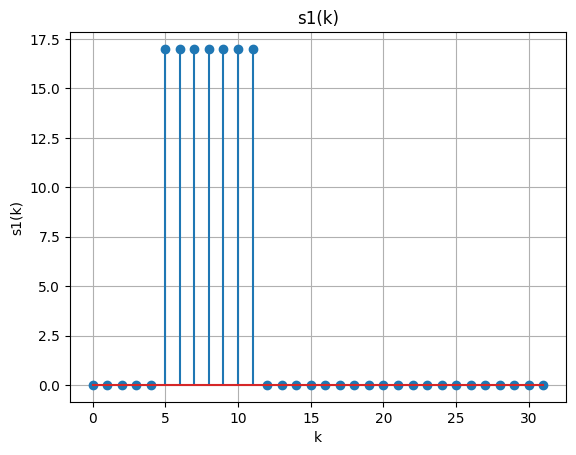

In [43]:
def sigma_d(k):
    return np.where(k >= 0, 1, 0)

k = np.arange(N) # return evenly spaced values within a given interval

def s1(k): # linear combination of the surges
    return U * (sigma_d(k - n0) - sigma_d(k - (n0 + n_imp)))

plt.stem(k, s1(k))
plt.xlabel('k')
plt.ylabel('s1(k)')
plt.title('s1(k)')

plt.grid()
plt.show()

**2.** Смоделировать линейную комбинацию дискретных гармонических сигналов $s_2(k)$:
$$s_2(k) = a_1x_1(k) + a_2x_2(k) + a_3x_3(k),$$
    где
    $$x_i(k) = B_isin(\hat{\omega_i}k),\quad i = 1,2,3,$$
    с выводом графиков последовательностей $x_i(k)$ и $s_2(k)$ на интервале времени $n \in [0, 5N - 1]$.

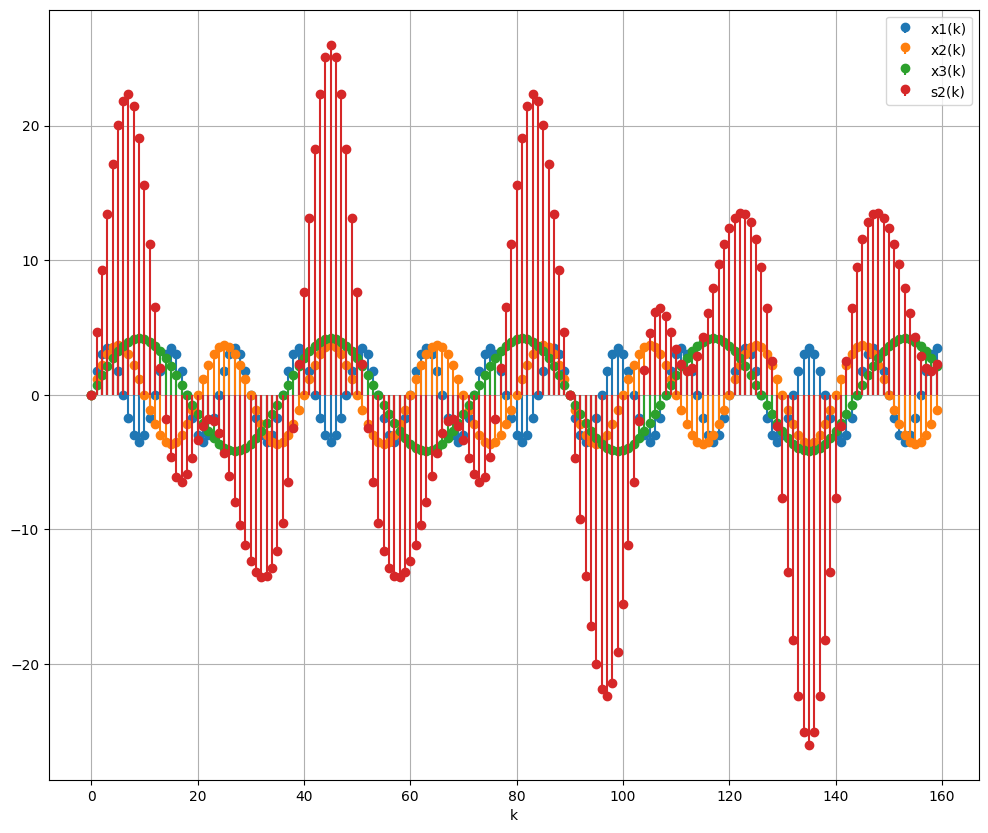

In [76]:
#x1 = x_i(B1, w1, k)
#x2 = x_i(B2, w2, k)
#x3 = x_i(B3, w3, k)
#s2 = a1 * x1 + a2 * x2 + a3 * x3

def x_i(b, w, k):
    return b * np.sin(w*k)

k = np.arange(5*N)

def s2(k):
    return a1 * x_i(B1, w1, k) + a2 * x_i(B2, w2, k) + a3 * x_i(B3, w3, k)

plt.figure(figsize=(12, 10))

plt.stem(k, x_i(B1, w1, k), linefmt="C0-", markerfmt="o", basefmt=" ", label="x1(k)")
plt.stem(k, x_i(B2, w2, k), linefmt="C1-", markerfmt="o", basefmt=" ", label="x2(k)")
plt.stem(k, x_i(B3, w3, k), linefmt="C2-", markerfmt="o", basefmt=" ", label="x3(k)")
plt.stem(k, s2(k), linefmt="C3-", markerfmt="o", basefmt=" ", label="s2(k)")

plt.xlabel("k")
plt.grid()
plt.legend()
plt.show()

Для удобства выведем графики по-отдельности

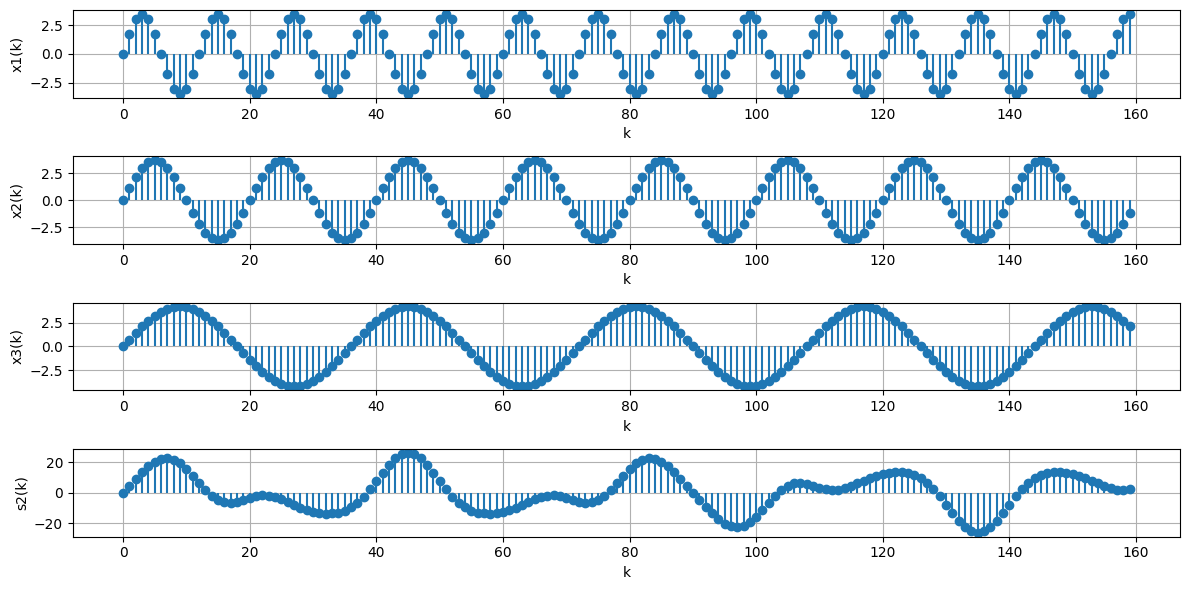

In [82]:
plt.figure(figsize=(12, 6))

plt.subplot(4, 1, 1)
plt.stem(k, x_i(B1, w1, k), linefmt="C0-", markerfmt="o", basefmt=" ", label="x1(k)")
plt.xlabel('k')
plt.ylabel('x1(k)')
plt.grid()

plt.subplot(4, 1, 2)
plt.stem(k, x_i(B2, w2, k), linefmt="C0-", markerfmt="o", basefmt=" ", label="x2(k)")
plt.xlabel('k')
plt.ylabel('x2(k)')
plt.grid()

plt.subplot(4, 1, 3)
plt.stem(k, x_i(B3, w3, k), linefmt="C0-", markerfmt="o", basefmt=" ", label="x3(k)")
plt.xlabel('k')
plt.ylabel('x3(k)')
plt.grid()

plt.subplot(4, 1, 4)
plt.stem(k, s2(k), linefmt="C0-", markerfmt="o", basefmt=" ", label="s2(k)")
plt.xlabel('k')
plt.ylabel('s2(k)')
plt.grid()

plt.tight_layout()
plt.show()

Вычислить среднее значение (идентификатор mean_s2), энергию (идентификатор E) и среднюю мощность последовательности $s_2(k)$ (идентификатор P). 

In [71]:
mean_s2 = np.mean(s2(k))
E = np.sum(s2(k)**2)
P = E / (N*5)

print("mean_s2: ", mean_s2)
print("E: ", E)
print("P: ", P)

mean_s2:  0.9482303675189678
E:  24233.794012941784
P:  151.46121258088615


Чтобы получить амплитуды комбинации сигналов для каждого отсчета требовалось определить величины амплитуды составляющих гармонических сигналов $x_1(k), x_2(k), x_3(k)$ и умножить их на соответствующие коэффициенты $a_1, a_2, a_3$

Для расчета полученного сигнала были определены характеристики согласно формулам:

Среднее значение дискретного сигнала: $M = \frac{\sum_{k=0}^{5N-1}x(s_2(k)}{N}$

Энергия дискретного сигнала: $E = \sum_{k=0}^{5N-1}|s_2(k)|^2$

Средняя мощность дискретного сигнала: $P = \frac{E}{5N} = \frac{\sum_{k=0}^{N}|s_2(k)|^2}{5N}$

**3.** Вывести график дискретного сигнала $s_3(k)$, представляющего собой дискретный гармонический сигнал $s(k)$:
$$s(k) = C*cos(\hat{\omega_0}*k)$$
    с экспоненциальной огибающей $|a|^k$, на интервале времени $n \in [0, N - 1]$. Привести аналитическую формулу дискретного сигнала $s_3(k)$ и пояснить операции при его моделировании. 

Чтобы получить сигнал $s_3(k)$ понадобится представить его в виде произведения дискретного гармонического сигнала $s(k)$ и экспоненциальной огибающей $|a|^k$:
$$s_3(k) = C * cos(\hat{\omega_0} * k) * |a|^k$$

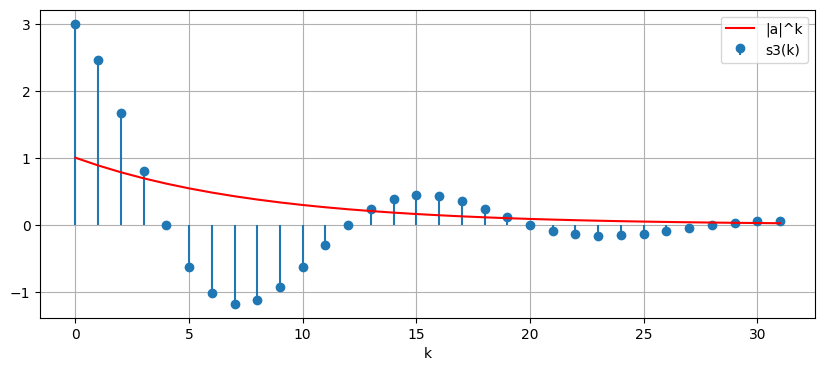

In [86]:
k = np.arange(N)

# define formulas for the s(k) and s_3(k) respectively
def s(k): 
    return C * np.cos(w0 * k)

def s3(k):
    return s(k) * np.abs(a)**k

plt.figure(figsize=(10, 4))
plt.stem(k, s3(k), linefmt="C0-", markerfmt="o", basefmt=" ", label="s3(k)")
plt.plot(abs(a)**k, color="red", label="|a|^k")
plt.xlabel("k")
plt.grid()
plt.legend()
plt.show()

**4.** Вывести график пяти периодов периодической последовательности $s_4(k)$ дискретных прямоугольных импульсов амплитуды $U$ и длительности $n_{imp}$ с периодом p, вдвое большим длительности импульса. Пояснить операции при моделировании периодической последовательности.

$$s(k) = C * cos(\hat{\omega_0} * k)$$

Чтобы получить сигнал $s_4(k)$ просуммируем прямоугольные импульсы $s_1(k)$ с задержкой $ip$, где i - индекс импульса. Также отметим что $p = 2 * n_{imp}$:

$$s_4(k) = \sum_{i = 0}^{N}s_1(k - i * 2 * n_{imp})$$

[ 0  0  0  0  0 17 17 17 17 17 17 17  0  0  0  0  0  0  0 17 17 17 17 17
 17 17  0  0  0  0  0  0  0 17 17 17 17 17 17 17  0  0  0  0  0  0  0 17
 17 17 17 17 17 17  0  0  0  0  0  0  0 17 17 17 17 17 17 17  0  0]


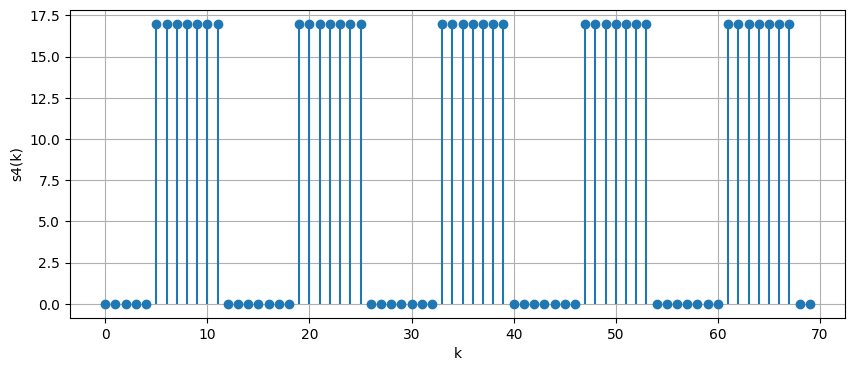

In [104]:
p = 2 * n_imp
k = np.arange(5*p)
n = 5
def s4(k):
    return sum([s1(k - i * p) for i in range(n)])

print(s4(k))

plt.figure(figsize=(10, 4))
plt.stem(k, s4(k), basefmt=" ")
plt.xlabel('k')
plt.ylabel('s4(k)')
plt.grid()
plt.show()

## Выводы

При выполнении данной работы было изучено математическое описание линейных комбинаций сигналов и способов их программного моделирования на языке Python. В процессе были смоделированы данные виды дискретных сигналов: дискретный прямоугольный импульс, дискретные гармонические сигналы и их линейные комбинации. Также были построены графики данных сигналов соответственно, а также вычислены такие характеристики как среднее значение, энергия и мощность. Изучив результаты вычислений можно определить, что составляющие линейную комбинацию сигналы влияют на форму результирующего сигнала, а линейные коэффициенты - на его амплитуду. Также была подтверждена возможность использовать линейные комбинации для построения периодических сигналов.